In [395]:
import pandas as pd
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [396]:
df = pd.read_csv("Resources/archive.zip")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [397]:
df.dtypes

rowid                  int64
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_n

In [398]:
intcolumns = df.select_dtypes(np.int64).columns
print(intcolumns)

for column in intcolumns:
    df = df.astype({column: 'float64'})

Index(['rowid', 'kepid', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec'],
      dtype='object')


In [399]:
print(df['koi_fpflag_nt'].unique())
print(df['koi_disposition'].unique())
print(df['koi_tce_plnt_num'].unique())
print(df['kepoi_name'].nunique())
print(df['koi_tce_delivname'].unique())

# Target  = koi_disposition . Refer to the column descriptions by the end of the notebook.

target = df["koi_disposition"]
target_names = ["CONFIRMED", "FALSE POSITIVE"]

[0. 1.]
['CONFIRMED' 'FALSE POSITIVE']
[1. 2. 3. 4. 5. 6. 7.]
2269
['q1_q17_dr25_tce']


<AxesSubplot:xlabel='ra', ylabel='dec'>

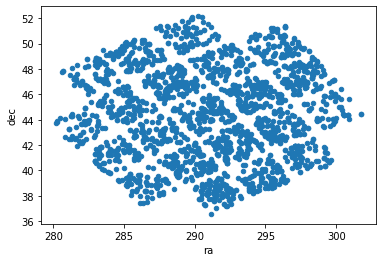

In [401]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'ra', y = 'dec')

<AxesSubplot:xlabel='koi_time0bk', ylabel='koi_period'>

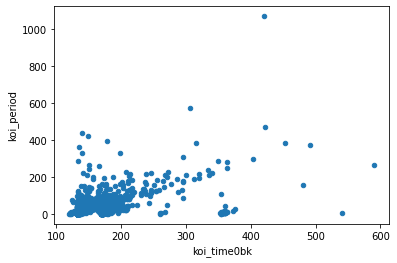

In [402]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'koi_time0bk', y = 'koi_period')

<AxesSubplot:xlabel='koi_period', ylabel='koi_duration'>

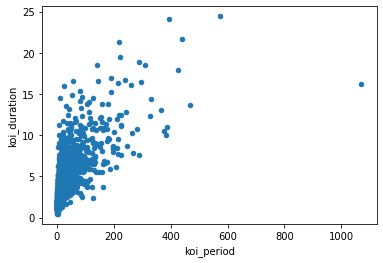

In [403]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'koi_period', y = 'koi_duration')

<AxesSubplot:xlabel='koi_steff', ylabel='koi_slogg'>

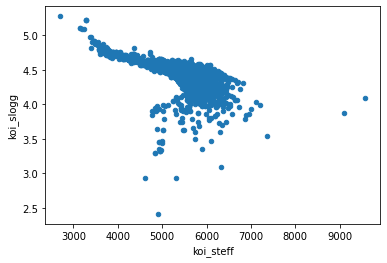

In [404]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'koi_steff', y = 'koi_slogg')

<AxesSubplot:xlabel='koi_slogg', ylabel='koi_srad'>

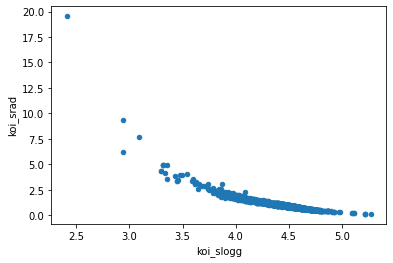

In [405]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'koi_slogg', y = 'koi_srad')

# Select your features (columns)

In [ ]:
columnslist = list(df.columns)
#print(columnslist)
columnslist.remove('kepoi_name')
columnslist.remove('kepler_name')
columnslist.remove('koi_pdisposition')
columnslist.remove('koi_tce_delivname')

#IDs not required
columnslist.remove('rowid')
columnslist.remove('kepid')

#Remove errors

columnslist.remove('koi_time0bk_err1')
columnslist.remove('koi_time0bk_err2')
columnslist.remove('koi_impact_err1')
columnslist.remove('koi_impact_err2')
columnslist.remove('koi_duration_err1')
columnslist.remove('koi_duration_err2')
columnslist.remove('koi_depth_err1')
columnslist.remove('koi_depth_err2')
columnslist.remove('koi_prad_err1')
columnslist.remove('koi_prad_err2')
columnslist.remove('koi_insol_err1')
columnslist.remove('koi_insol_err2')
columnslist.remove('koi_steff_err1')
columnslist.remove('koi_steff_err2')
columnslist.remove('koi_slogg_err1')
columnslist.remove('koi_slogg_err2')
columnslist.remove('koi_srad_err1')
columnslist.remove('koi_srad_err2')


new_df = df[columnslist]
new_df.head()

In [416]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


https://machinelearningmastery.com/feature-selection-machine-learning-python/

#best_features_fscore = dataframe.columns[fs_indices_fscore].values
#best_features_fscore

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SyntaxError: invalid syntax (<ipython-input-417-45476d265c97>, line 1)

In [407]:
# Set features. This will also be used as your x values.
#selected_features = df[['kepid', 'kepoi_name', 'kepler_name', 'features', 'here']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [408]:
data = new_df.drop("koi_disposition", axis=1)
feature_names = data.columns
data.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [409]:
X_train.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_impact,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
5356,1.0,0.0,0.0,0.0,0.0,219.321556,8.517000e-04,-8.517000e-04,320.728620,0.244,...,313.0,2.27,93.8,1.0,6063.0,4.476,1.012,287.47763,46.141178,15.273
1851,1.0,0.0,0.0,0.0,0.0,4.893365,3.609000e-05,-3.609000e-05,133.644900,0.218,...,1374.0,842.45,15.9,1.0,6688.0,4.304,1.347,289.74731,39.523453,13.827
2202,1.0,0.0,0.0,0.0,0.0,13.712185,6.013000e-05,-6.013000e-05,135.518750,0.680,...,676.0,49.26,22.6,1.0,5550.0,4.562,0.831,294.53354,46.618271,15.935
2949,1.0,0.0,0.0,0.0,0.0,4.454194,3.360000e-07,-3.360000e-07,172.820223,0.479,...,1017.0,252.22,1022.2,1.0,5359.0,4.425,0.915,299.90591,45.439678,14.995
771,1.0,0.0,0.0,0.0,0.0,5.968724,6.037000e-06,-6.037000e-06,137.158607,0.166,...,1251.0,579.90,107.1,1.0,6122.0,4.173,1.439,294.74207,43.536831,13.717


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [410]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Scale your data

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model



In [411]:
model2 = LogisticRegression(solver='newton-cg', multi_class='auto')
model2
model2.fit(X_train, y_train)

c:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(solver='newton-cg')

In [412]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.9994121105232217
Testing Data Score: 1.0


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [413]:
# Create the GridSearchCV model

In [414]:
# Train the model with GridSearch

In [415]:
print(grid2.best_params_)
print(grid2.best_score_)

NameError: name 'grid2' is not defined

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)

## DATA SET COLUMNS

###### koi_score: A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. The value is calculated from a Monte Carlo technique such that the score's value is equivalent to the frction of iterations where the Robovetter yields a disposition of CANDIDATE.


###### koi_pdisposition: The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE. (koi_score used to calculate this category.)

###### koi_fpflag_nt: Not Transit-Like Flag
###### koi_fpflag_ss: Stellar Eclipse Flag
###### koi_fpflag_co: Centroid Offset Flag
###### koi_fpflag_ec: Ephemeris Match Indicates Contamination Flag
###### koi_period: Orbital Period
###### koi_period_err1 and koi_period_err2: Uncertainties Column (positive and negative)
###### koi_time0: Transit Epoch (BJD - 2,454,833.0)
###### koi_impact: The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.	Impact Parameter.
###### koi_impact_err1 and koi_impact_err2: Uncertainties Column (positive and negative)
###### koi_duration:	Transit Duration (hours). The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact
###### koi_duration_err1 and koi_duration_err2: Uncertainties Column (positive and negative)
###### koi_depth: Transit Depth (parts per million). The fraction of stellar flux lost at the minimum of the planetary transit. 
###### koi_depth_err1 and koi_depth_err2: Uncertainties Column (positive and negative)
###### koi_prad: Planetary Radius (Earth radii). The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius.
###### koi_prad_err1 and koi_prad_err2: Uncertainties Column (positive and negative)
###### koi_teq: Equilibrium Temperature (Kelvin)
###### koi_insol: Insolation Flux [Earth flux]. Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.
###### koi_model_snr: Transit Signal-to-Noise
###### koi_tce_plnt_num: TCE Planet Number. TCE Planet Number federated to the KOI.
###### koi_tce_delivname:TCE Delivery Name. TCE delivery name corresponding to the TCE data federated to the KOI.
###### koi_steff: Stellar Effective Temperature (Kelvin). The photospheric temperature of the star.
###### koi_steff_err1 and koi_steff_err2 : Uncertainties Column (positive and negative)
###### koi_slogg: Stellar Surface Gravity (log10(cm s-2)
###### koi_slogg_err1 and koi_slogg_err2 : Uncertainties Column (positive and negative)
###### koi_srad: Stellar Radius (solar radii)
###### koi_srad_err1 and koi_srad_err2: Uncertainties Column (positive and negative)
###### ra: RA (deg) KIC Right Ascension
###### dec: Dec (deg) KIC Declination
###### koi_kepmag: Kepler-band (mag)

## koi_pdisposition : Disposition Using Kepler Data

###### The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE. The value of this flag may change over time as the evaluation of KOIs proceeds to deeper levels of analysis using Kepler time-series pixel and light curve data, or follow-up observations. A not dispositioned value corresponds to objects for which the disposition tests have not yet been completed. A false positive has failed at least one of the tests described in Batalha et al. (2012). A planetary candidate has passed all prior tests conducted to identify false positives, although this does not a priori mean that all possible tests have been conducted. A future test may confirm this KOI as a false positive. False positives can occur when: 1) the KOI is in reality an eclipsing binary star, 2) the Kepler light curve is contaminated by a background eclipsing binary, 3) stellar variability is confused for coherent planetary transits, or 4) instrumental artifacts are confused for coherent planetary transits.